Chapter 28
# 可视化矮胖矩阵奇异值分解
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 创建数据

In [2]:
num = 21

array_1_0 = np.linspace(0,1,num)
array_0_0 = np.ones_like(array_1_0)
array_1_1 = np.zeros_like(array_1_0)

A1 = np.column_stack([array_1_0,array_0_0,array_0_0])
A2 = np.column_stack([array_1_0,array_1_1,array_0_0])
A3 = np.column_stack([array_1_0,array_0_0,array_1_1])
A4 = np.column_stack([array_1_0,array_1_1,array_1_1])

A = np.vstack((A1,A2,A3,A4))
B = np.roll(A, 1)
C = np.roll(A, 2)

X   = np.vstack((A,B,C))
colors = np.vstack((A,B,C))

## 三维散点

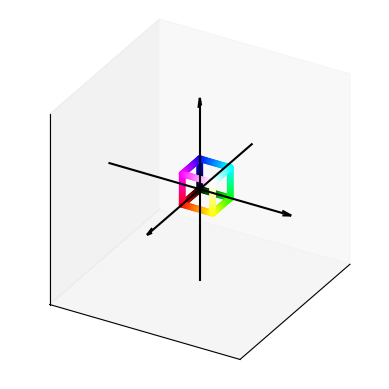

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = colors, s = 15, alpha = 1) 


ax.set_proj_type('ortho')
ax.view_init(azim=30, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-3,0,0],[0,-3,0],[0,0,-3]])
u, v, w = np.array([[6,0,0],[0,6,0],[0,0,6]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
fig.savefig('Figures/矮胖矩阵SVD，变换前.svg', format='svg')

## 定义矩阵A

In [4]:
A = np.array([[0, 1],
              [1, 1],
              [1, 0]])
# A = np.array([[0, 0],
#               [1, -0.5],
#               [1, -0.5]])

A = A.T
# 将细高矩阵，转置为，矮胖矩阵

In [5]:
from sympy import Matrix
A_ = Matrix(A)
U__, S__, V__ = A_.singular_value_decomposition()
# 注意，并非完全SVD分解，不同于后文的SVD分解结果

In [6]:
U__

Matrix([
[-sqrt(2)/2, sqrt(2)/2],
[ sqrt(2)/2, sqrt(2)/2]])

In [7]:
V__

Matrix([
[ sqrt(2)/2, sqrt(6)/6],
[         0, sqrt(6)/3],
[-sqrt(2)/2, sqrt(6)/6]])

In [8]:
# 验证书中结果
U_test = np.array([[np.sqrt(2)/2, -np.sqrt(2)/2],
                   [np.sqrt(2)/2, np.sqrt(2)/2]])

S_test = np.array([[np.sqrt(3), 0, 0],
                   [0, 1, 0]])

V_T_test = np.array([[1/np.sqrt(6),2/np.sqrt(6),1/np.sqrt(6)],
                     [np.sqrt(2)/2, 0, -np.sqrt(2)/2],
                     [np.sqrt(3)/3,-np.sqrt(3)/3,np.sqrt(3)/3]])

In [9]:
U_test @ S_test @ V_T_test

array([[0., 1., 1.],
       [1., 1., 0.]])

In [10]:
V_T_test.T @ S_test.T @ U_test.T

array([[0., 1.],
       [1., 1.],
       [1., 0.]])

In [11]:
U_test.T

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

## 用矩阵A完成映射

(-3.0, 3.0)

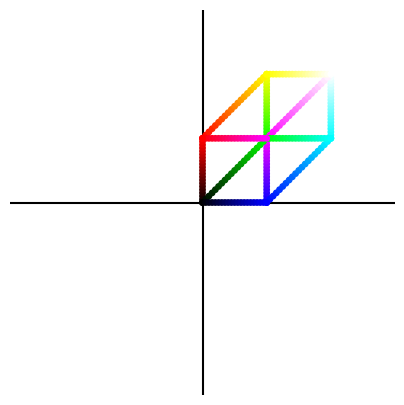

In [12]:
Z = X@A.T

fig, ax = plt.subplots(figsize = (5,5))

plt.scatter(Z[:,0], Z[:,1], c = colors, s = 15, zorder=1e3)

plt.axis('scaled')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# fig.savefig('Figures/矮胖矩阵SVD，变换后.svg', format='svg')

## 奇异值分解

In [13]:
U,S,VT = np.linalg.svd(A, full_matrices=True)
V = VT.T
S = np.diag(S)
S = np.column_stack((S,np.array([[0],[0]])))
S
# A = U @ S @ VT
# AT = V @ ST @ UT

array([[1.73205081, 0.        , 0.        ],
       [0.        , 1.        , 0.        ]])

## 三维旋转

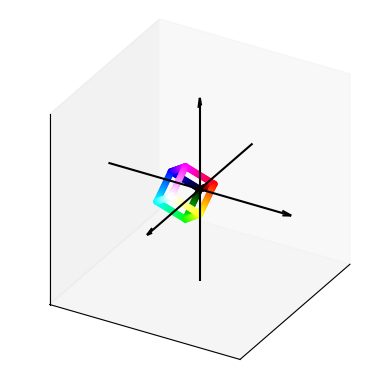

In [14]:
Z = X@V

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c = colors, s = 15, alpha = 1) 


ax.set_proj_type('ortho')
ax.view_init(azim=30, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-3,0,0],[0,-3,0],[0,0,-3]])
u, v, w = np.array([[6,0,0],[0,6,0],[0,0,6]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
# fig.savefig('Figures/矮胖矩阵SVD，V旋转.svg', format='svg')

## 缩放 + 降维

(-3.0, 3.0)

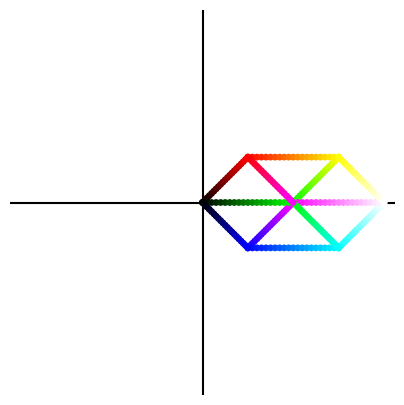

In [15]:
Z = X@V@S.T
fig, ax = plt.subplots(figsize = (5,5))

plt.scatter(Z[:,0], Z[:,1], c = colors, s = 15, zorder=1e3)

plt.axis('scaled')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# fig.savefig('Figures/矮胖矩阵SVD，V旋转-S缩放，2D.svg', format='svg')

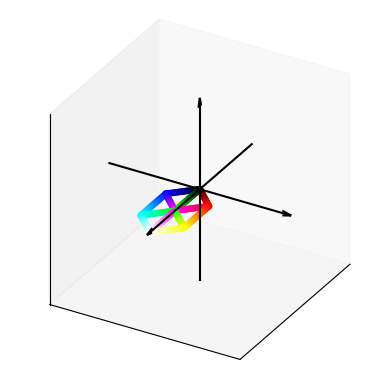

In [16]:
# 在三维空间呈现
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,1] * 0, c = colors, s = 15, alpha = 1) 


ax.set_proj_type('ortho')
ax.view_init(azim=30, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-3,0,0],[0,-3,0],[0,0,-3]])
u, v, w = np.array([[6,0,0],[0,6,0],[0,0,6]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
fig.savefig('Figures/矮胖矩阵SVD，V旋转-S缩放，3D.svg', format='svg')

## 平面旋转

In [17]:
Z = X@V@S.T@U.T

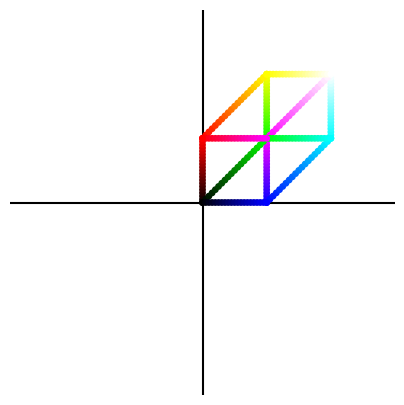

In [18]:
fig, ax = plt.subplots(figsize = (5,5))

plt.scatter(Z[:,0], Z[:,1], c = colors, s = 15, zorder=1e3)

plt.axis('scaled')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# fig.savefig('Figures/矮胖矩阵SVD，V旋转-S缩放-UT旋转，2D.svg', format='svg')

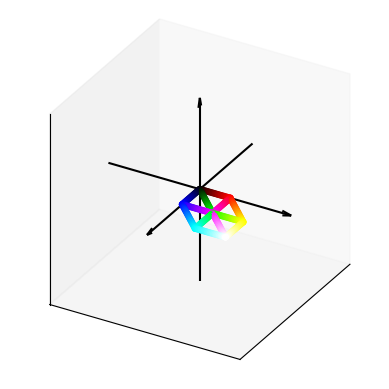

In [19]:
# 在三维空间呈现
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,1] * 0, c = colors, s = 15, alpha = 1) 


ax.set_proj_type('ortho')
ax.view_init(azim=30, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-3,0,0],[0,-3,0],[0,0,-3]])
u, v, w = np.array([[6,0,0],[0,6,0],[0,0,6]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
# fig.savefig('Figures/矮胖矩阵SVD，V旋转-S缩放-UT旋转，3D.svg', format='svg')